<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/FuzzyLogic/FuzzyLogic_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn matplotlib

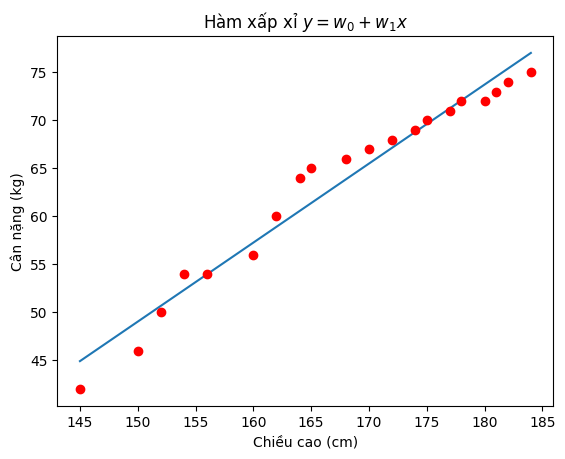

Chiều cao: 150
=> Cân nặng của người có chiều cao 150.0 cm là: 123.62206227686673 kg


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([[145, 150, 152, 154, 156, 160, 162, 164, 165, 168, 170, 172, 174, 175,
177, 178, 180, 181, 182, 184]]).T
y = [42, 46, 50, 54, 54, 56, 60, 64, 65, 66, 67, 68, 69, 70, 71, 72, 72, 73, 74, 75]

# Tạo ma trận X
N = len(x)
onesMat = np.ones((1, N))
# Nối ma trận 1 với ma trận N theo hàng
X = np.concatenate((onesMat, x.T), axis = 0)
# Gom lại để thành ma trận A và vector b
A = np.dot(X, X.T)
b = np.dot(X, y)
# Giải hệ phương trình để tìm w
w = np.dot(np.linalg.pinv(A), b)
w0 = w[0]
w1 = w[1]
# Vẽ đồ thị y = w0 + w1x
## Tạo ra 2 đoạn dữ liệu trong khoảng 145 -> 184 với bước nhảy là 2
x0 = np.linspace(145, 184, 2)
## Tính toán để có mảng y0 tương ứng với x0 dựa vào hàm tuyến tính đã tìm ra
y0 = w0 + w1 * x0
plt.plot(x0, y0)
plt.plot(x, y, 'ro')
plt.title('Hàm xấp xỉ $y=w_0+w_1x$')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()

# Dùng Hồi quy tuyến tính để dự đoán
linear_model = LinearRegression()
linear_model.fit(X.T, y)
w0 = linear_model.coef_.T[0]
w1 = linear_model.coef_.T[1]
i = float(input('Chiều cao: '))
y_pred = w0 + w1 * i
print( f'=> Cân nặng của người có chiều cao {i} cm là: {y_pred} kg')

In [ ]:
from scipy.optimize import optimize
import numpy as np
import tensorflow as tf

xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=float)
print(xy)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, y_data.shape)
nb_classes = 7
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(float, [None, 16])
Y = tf.compat.v1.placeholder(np.int32, [None, 1])
Y_one_hot = tf.one_hot(Y, nb_classes)
print(Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
W = tf.Variable(tf.random.normal([16, nb_classes]))
b = tf.Variable(tf.random.normal([nb_classes]))
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y_one_hot, logits=logits))
optimizer=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.compat.v1.Session() as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  for step in range(2001):
    _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        print(f'Step: {step, cost_val, acc_val}')
        pred = sess.run(prediction, feed_dict={X: x_data})

        for p, y in zip(pred, y_data.flatten()):
          print(f'Prediction: {p == int(y), p, int(y)}')


[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 3.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 6.]
 [0. 1. 1. ... 0. 0. 1.]]
(101, 16) (101, 1)
Tensor("one_hot_18:0", shape=(None, 1, 7), dtype=float32)
Step: (0, 5.66295, 0.15841584)
Prediction: (False, 1, 0)
Prediction: (False, 6, 0)
Prediction: (False, 1, 3)
Prediction: (False, 1, 0)
Prediction: (False, 1, 0)
Prediction: (False, 6, 0)
Prediction: (False, 6, 0)
Prediction: (False, 1, 3)
Prediction: (False, 1, 3)
Prediction: (False, 1, 0)
Prediction: (False, 1, 0)
Prediction: (False, 2, 1)
Prediction: (False, 1, 3)
Prediction: (False, 3, 6)
Prediction: (False, 1, 6)
Prediction: (False, 1, 6)
Prediction: (True, 1, 1)
Prediction: (False, 6, 0)
Prediction: (False, 1, 3)
Prediction: (False, 1, 0)
Prediction: (False, 2, 1)
Prediction: (True, 1, 1)
Prediction: (False, 6, 0)
Prediction: (False, 2, 1)
Prediction: (False, 1, 5)
Prediction: (False, 1, 4)
Prediction: (False, 1, 4)
Prediction: (False, 1, 0)
Prediction

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing  import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
scaler = MinMaxScaler(feature_range=(0, 1))
xy = scaler.fit_transform(xy)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data[0], y_data[0])
print(x_data[1], y_data[1])
x_data = np.delete(x_data, -1, 0)
y_data = np.delete(y_data, 0)
print('Dự báo ngày mai')
print(f'{x_data[0]} => {y_data[0]}')
# Tách tập dữ liệu
x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.2,
    random_state=40
)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# Đào tạo mô hình
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer='adam',
    metrics=['mse']
)
model.fit(
    x_train,
    y_train,
    epochs=100
)

sai_so, do_chinh_xac = model.evaluate(x_test, y_test)
print(f'Sai số: {sai_so}')
print(f'Độ chính xác: {do_chinh_xac}')




[0.97333581 0.97543152 1.         0.11112306] [0.98831302]
[0.95690035 0.95988111 0.9803545  0.14250246] [0.97785024]
Dự báo ngày mai
[0.97333581 0.97543152 1.         0.11112306] => 0.9778502390712853
(584, 4) (584,) (147, 4) (147,)
Train on 584 samples
Epoch 1/100
584/584 [==============================] - 0s 628us/sample - loss: 0.0022 - mse: 0.0022
Epoch 2/100
584/584 [==============================] - 0s 108us/sample - loss: 0.0017 - mse: 0.0017
Epoch 3/100
584/584 [==============================] - 0s 76us/sample - loss: 0.0014 - mse: 0.0014 
Epoch 4/100
584/584 [==============================] - 0s 59us/sample - loss: 0.0013 - mse: 0.0013 
Epoch 5/100
584/584 [==============================] - 0s 55us/sample - loss: 0.0012 - mse: 0.0012
Epoch 6/100
584/584 [==============================] - 0s 58us/sample - loss: 0.0012 - mse: 0.0012
Epoch 7/100
584/584 [==============================] - 0s 79us/sample - loss: 0.0011 - mse: 0.0011
Epoch 8/100
584/584 [===========================

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
